# Comparison of Multivariate Linear Regression Models
**Md Fazlay Rabbi Masum Billah (masum@virginia.edu)**

***
## 1. BIG PICTURE
In this problem, I am using the US census data for tracts and counties. Here, I am trying to investigate the average income of the residents of a county. There are number of factors that might effect the per capita income of a county. Such as total population in the county, number of private and public jobs, population ratio between different races and so on.
This dataset can be downloaded from here- https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_census_tract_data.csv

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

dataset_url = "https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_census_tract_data.csv"

np.random.seed(42)

def load_result_data(file_path = './'):
    csv_path = os.path.join(file_path, "acs2015_census_tract_data.csv")
    return pd.read_csv(csv_path)

result = load_result_data()

fileSize = result.memory_usage(index = True).sum()/(1024*1024)
numberOfEntries = len(result)
numberOfFeatures = len(result.columns)
basicStat = result.describe()

print("\nTotal size of data = ", "{:.4f}".format(fileSize), " MB") 
print("Number of entries = ", numberOfEntries)
print("Number of features = ", numberOfFeatures)



Total size of data =  20.8896  MB
Number of entries =  74001
Number of features =  37


---
## 2. DATA DISCOVERY, CLEANING, AND SCALING

**Data Discover:** 

In [21]:
corr_matrix = result.corr()
corr_matrix["Income"].sort_values(ascending = False)

Income             1.000000
IncomePerCap       0.834342
Professional       0.731697
IncomeErr          0.614119
IncomePerCapErr    0.495473
WorkAtHome         0.370850
Employed           0.318049
White              0.314051
Asian              0.281797
MeanCommute        0.230141
Citizen            0.204361
Men                0.176727
TotalPop           0.174527
Women              0.166638
SelfEmployed       0.089692
Drive              0.086121
Pacific            0.007893
FamilyWork         0.004560
PublicWork        -0.008063
Transit           -0.009502
PrivateWork       -0.035394
CensusTract       -0.068009
Office            -0.068258
Native            -0.071805
OtherTransp       -0.105491
Walk              -0.148499
Hispanic          -0.227380
Carpool           -0.285227
Black             -0.310067
Construction      -0.330709
Unemployment      -0.483252
Production        -0.497461
Service           -0.586825
ChildPoverty      -0.663684
Poverty           -0.702208
Name: Income, dtype:

**Dropping some features based on correlation:**

In [23]:
result = result.drop(["State","County","CensusTract", "IncomePerCap", "Professional", "Poverty", "ChildPoverty"], axis =1)

**Data Cleaning:**

In [24]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

imputer = Imputer(strategy="median")
imputer.fit(result)
X = imputer.transform(result)
result_transformed = pd.DataFrame(X, columns=result.columns,index = list(result.index.values))

**Feature Scaling:**

In [25]:
scaler = StandardScaler()
scaler.fit(result_transformed)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Dividing Training and Testing Set:**

In [26]:
train_set, test_set = train_test_split(result_transformed, test_size=0.2, random_state=42)

X_train = train_set.drop("Income",axis=1)
Y_train = train_set["Income"]

X_test = test_set.drop("Income",axis=1)
Y_test = test_set["Income"]

## 3. IMPLEMENTATION OF GRADIENT DESCENT

I have implemented mini-batch gradient descent here. Since the dataset is large batch gradient descent results in out of memory error.   

In [27]:
import numpy as np

class MyLinearRegression:
    def __init__ (self,m,n, learningRate):
        
        self.theta = np.random.randn(n,1); # parameter vector;
        self.alpha = learningRate; #learning rate
        self.cost  = []; # cost function
        self.iteration = 100; #number of iteration
        self.m = m; #number of rows
        
    def fitUsingGradientDescent(self, X_train, Y_train):
        
        for i in range (self.iteration):
            self.gradientDescent(X_train, Y_train, self.theta, self.alpha, self.iteration)
            
    def gradientDescent(self, X_train, Y_train, theta, alpha, iters):        
        
        x_train = X_train.sample(frac=0.001) #taking 0.1% of the whole dataset for mini-batch
        y_train = pd.DataFrame(Y_train, index = x_train.index.values) #taking corresponding y value
        
        loss = x_train.values.dot(theta) - y_train.values
        gradient =pd.DataFrame((2/self.m)*(x_train.values).T.dot(loss))
        self.theta = pd.DataFrame(self.theta - alpha*gradient.values)
    
        self.computeCostFunc(x_train, y_train,loss)
    
    def computeCostFunc(self, X_train, Y_train, loss):
        
        self.cost.append((sum(loss)**2)/(2*len(X_train.index)))
        
    def predict(self, X_test):
        
        y_predict = pd.DataFrame(X_test.values.dot(self.theta))
        return y_predict
    
    
    def fitUsingNormalEquation(self, X_train, Y_train):
        
        X_b = pd.DataFrame(np.c_[np.ones((len(X_train.index),1)),X_train.values])
        self.theta = pd.DataFrame(np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y_train.values))


**Learning Rate:**

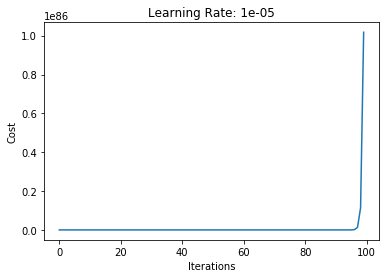

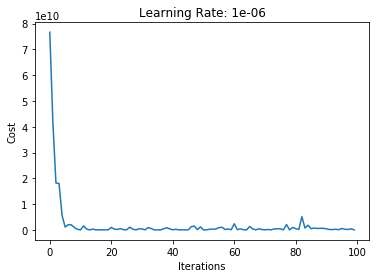

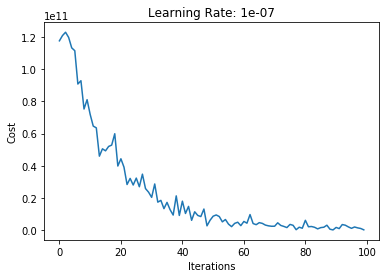

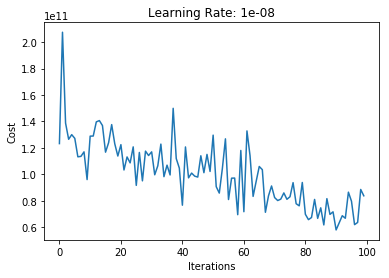

In [28]:
learningRates =[0.00001,0.000001,0.0000001,0.00000001]

for i in range (len(learningRates)):
    
    myGradientDescentModel = MyLinearRegression(len(X_train.index), len(X_train.columns),learningRates[i])
    myGradientDescentModel.fitUsingGradientDescent(X_train, Y_train)    

    Y_predict = myGradientDescentModel.predict(X_test)
    #print(Y_predict)


    import matplotlib.pyplot as plt
    import numpy as np

    x = myGradientDescentModel.iteration
    y = myGradientDescentModel.cost

    df=pd.DataFrame({'xvalues': range(0,myGradientDescentModel.iteration), 'yvalues': y })

    plt.xlabel('Iterations')  
    plt.ylabel('Cost')  
    plt.title('Learning Rate: '+ str(learningRates[i]))
    
    plt.plot( 'xvalues', 'yvalues', data=df)
    plt.show()

From the Error vs. training figures above, it is clear that mini-batch gradient descent for this dataset would work better for learning rate = 0.000001

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION

In [29]:
myNormalEquationModel = MyLinearRegression(len(X_train.index), len(X_train.columns)+1,0)
myNormalEquationModel.fitUsingNormalEquation(X_train,Y_train)
X_test_b = pd.DataFrame(np.c_[np.ones((len(X_test.index),1)),X_test.values])
Y_predict_normal = myNormalEquationModel.predict(X_test_b)

- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS

In [30]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor(max_iter=100)
mySGDModel.fit(X_train,Y_train)
y_predict = mySGDModel.predict(X_test)
SGD_mse = mean_squared_error(Y_test, y_predict)
mySGDModel_rmse = np.sqrt(SGD_mse)
print("Built-in Stochastic Gradient Descent Model RMSE: "+str(mySGDModel_rmse))

#Use My Minibatch Gradient Descent Model
myGradientDescentModel = MyLinearRegression(len(X_train.index), len(X_train.columns),0.000001)
myGradientDescentModel.fitUsingGradientDescent(X_train, Y_train)    
Y_predict_MBGD = myGradientDescentModel.predict(X_test)
MBGD_mse = mean_squared_error(Y_test, Y_predict_MBGD)
myMBGD_rmse = np.sqrt(MBGD_mse)
print("My Minibatch Gradient Descent Model RMSE: "+str(myMBGD_rmse))

#Use My Normal Equation Model
myNormalEquationModel = MyLinearRegression(len(X_train.index), len(X_train.columns)+1,0)
myNormalEquationModel.fitUsingNormalEquation(X_train,Y_train)
X_test_b = pd.DataFrame(np.c_[np.ones((len(X_test.index),1)),X_test.values])
Y_predict_NEM = myNormalEquationModel.predict(X_test_b)
NEM_mse = mean_squared_error(Y_test, Y_predict_NEM)
myNEM_rmse = np.sqrt(NEM_mse)
print("My Normal Equation Model RMSE: "+str(myNEM_rmse))

Built-in Stochastic Gradient Descent Model RMSE: 9062268783994234.0
My Minibatch Gradient Descent Model RMSE: 21721.395842935224
My Normal Equation Model RMSE: 36256.6025508617


## 6. PRESENTATION OF MY SOLUTION

* In this problem I have implemented two different models to predict the per capita income of a USA county. One is Mini-batch Gradient Descent model and another is Normal Equation Model.
* While implementing the models I have observed few things-
    * Batch Gradient Descent is too slow when the dataset is too large. As such I have to use Mini-batch Gradient Descent
    * I had to drop few features looking at the correlation value with the feature *income*. For example, feature *poverty* and feature *profession* is too much relared with the feature *income*. That's why I dropped these feature.
    * Had to perform data cleaning. For example, in this dataset although feature *CensusTract* is a numerical value it is only the id. Including this feature in training would end up in wrong prediction. Again, some features such as *county name* doesn't have any effect in per capita income. As such I had to drop it.
    * There were few empty cells. I had to take care of those missing values
* This solution can be improved if we had some more features such as types of jobs a county offers, age of people etc. Since these features have significant effect on per capita income.